In [6]:
import pandas as pd
from barplots import barplots

In [13]:
df = pd.read_csv("approximated_walks.csv")
df["Max Neighbours"] = [
    "10" if val == 10 else "Max"
    for val in df["Max Neighbours"].values
]

In [14]:
df

,run_type,embedding_model,Max Neighbours,loss,accuracy,recall,precision,AUROC,AUPRC,f1_score,balanced_accuracy,specificity,miss_rate,fall_out,mcc
0,train,SkipGram,10,0.125771,0.961001,0.980158,0.943990,0.992490,0.991580,0.961734,0.961001,0.941844,0.019842,0.058156,0.922679
1,test,SkipGram,10,0.142006,0.956011,0.970579,0.943100,0.990041,0.989898,0.956642,0.956011,0.941442,0.029421,0.058558,0.912409
2,train,SkipGram,Max,0.134061,0.960209,0.959310,0.961038,0.991448,0.990662,0.960173,0.960209,0.961108,0.040690,0.038892,0.920420
3,test,SkipGram,Max,0.150569,0.955175,0.949674,0.960238,0.989010,0.989044,0.954927,0.955175,0.960676,0.050326,0.039324,0.910405
4,train,SkipGram,10,0.134524,0.957798,0.977913,0.940092,0.991456,0.990488,0.958630,0.957798,0.937682,0.022087,0.062318,0.916337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,test,SkipGram,Max,0.143696,0.953974,0.971368,0.938711,0.989729,0.989621,0.954760,0.953974,0.936579,0.028632,0.063421,0.908497
116,train,SkipGram,10,0.126927,0.960120,0.979150,0.943250,0.992231,0.991188,0.960865,0.960120,0.941090,0.020850,0.058910,0.920908
117,test,SkipGram,10,0.143394,0.955167,0.970000,0.942053,0.989668,0.989525,0.955823,0.955167,0.940334,0.030000,0.059666,0.910735
118,train,SkipGram,Max,0.130932,0.958856,0.977633,0.942248,0.991451,0.990343,0.959614,0.958856,0.940079,0.022367,0.059921,0.918360


In [25]:
from scipy.stats import wilcoxon
results = []

for metric in df.columns[4:]:
    statistic, p_value = wilcoxon(
        df[df.run_type == "test"][df["Max Neighbours"] == "Max"][metric],
        df[df.run_type == "test"][df["Max Neighbours"] == "10"][metric],
    )
    results.append({
        "Metric": metric,
        "P-value": p_value,
        "statistic": statistic
    })
results = pd.DataFrame(results).T
new_header = results.iloc[0] #grab the first row for the header
results = results[1:] #take the data less the header row
results.columns = new_header #set the header row as the df header
print(results[["accuracy", "AUROC", "AUPRC", "f1_score"]].to_latex())

\begin{tabular}{lllll}
\toprule
Metric &    accuracy &       AUROC &       AUPRC &    f1\_score \\
\midrule
P-value   &    0.477947 &    0.360039 &    0.360039 &    0.338856 \\
statistic &  198.000000 &  188.000000 &  188.000000 &  186.000000 \\
\bottomrule
\end{tabular}



/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Rendering barplots:   0%|          | 0/12 [00:00<?, ?it/s]

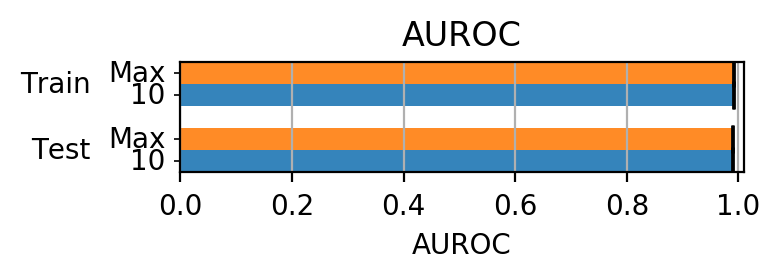

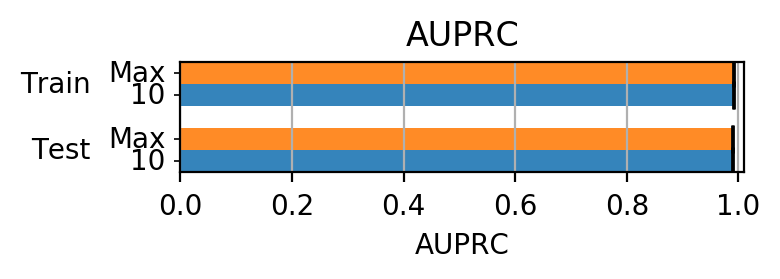

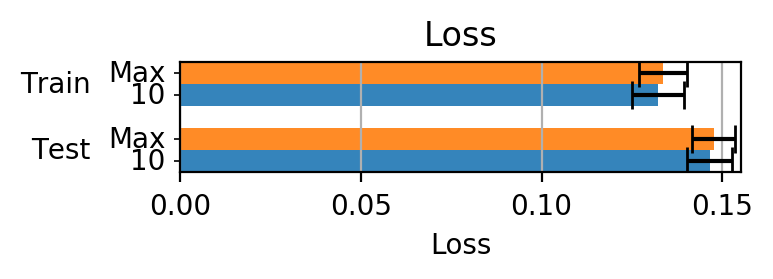

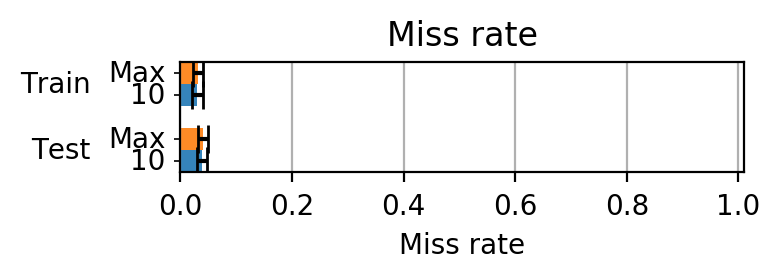

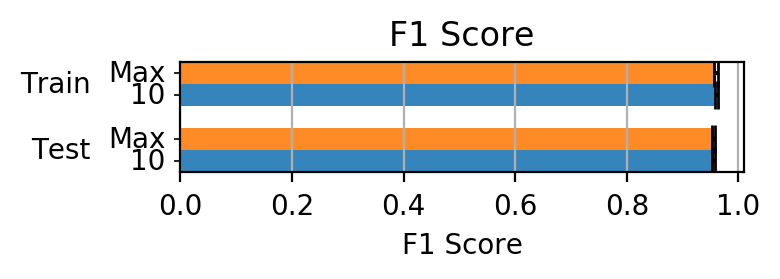

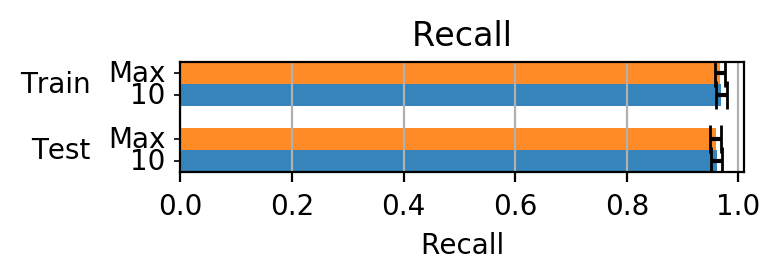

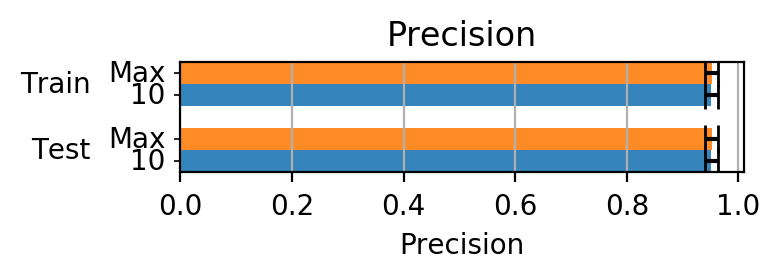

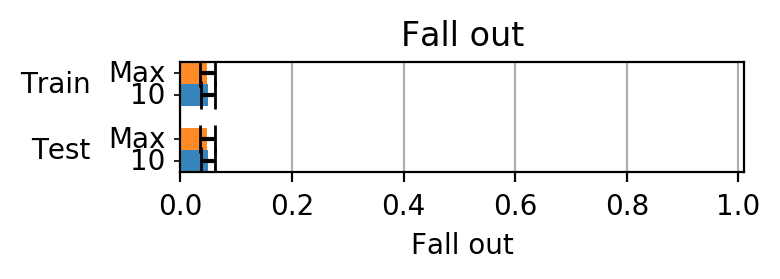

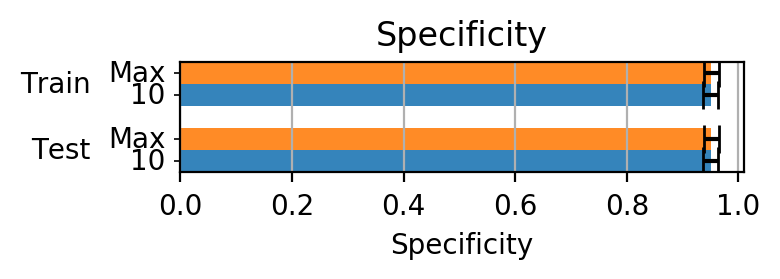

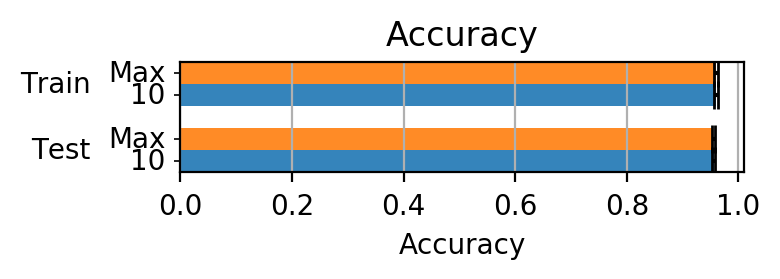

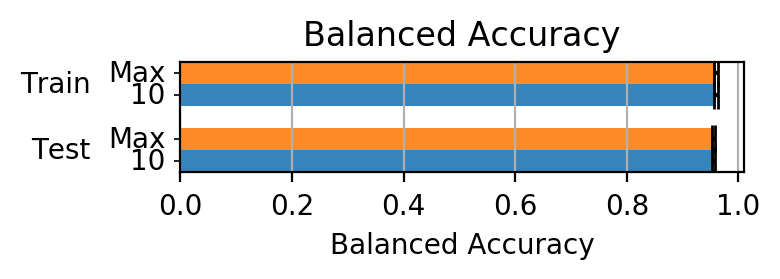

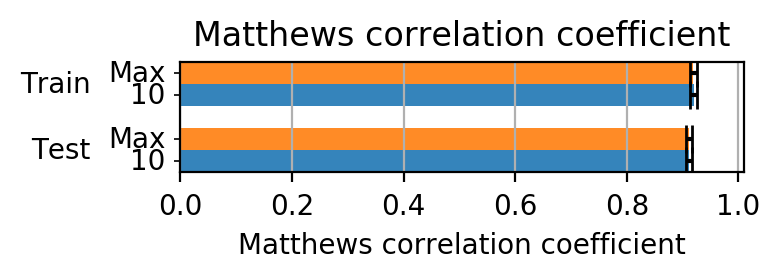

In [17]:
_ = barplots(
    df,
    groupby=["run_type", "Max Neighbours"],
    show_legend=False,
    height=4,
    orientation="horizontal"
)